In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Downloads/hotel_bookings.csv')

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
df.shape

(119390, 32)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [11]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [13]:
# Filling missing values

df['children'].fillna(0,inplace=True)
df['country'].fillna(df['country'].mode()[0],inplace=True)
df['agent'].fillna(0,inplace=True)
df.drop(columns=['company'],inplace=True)

In [15]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

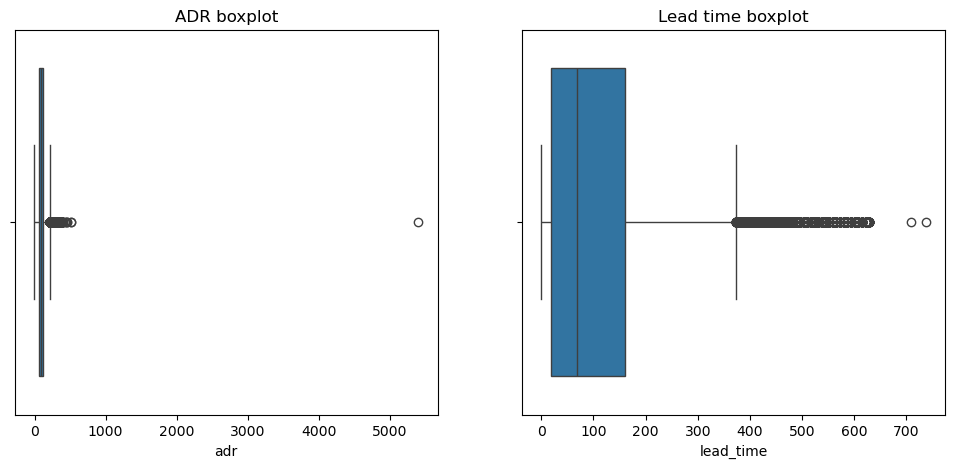

In [17]:
#Outlier detection

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x=df['adr'])
plt.title('ADR boxplot')

plt.subplot(1,2,2)
sns.boxplot(x=df['lead_time'])
plt.title('Lead time boxplot')

plt.show()


In [19]:
#Outlier Treatment

np.percentile(df.adr,[99])

array([252.])

In [21]:
np.percentile(df.adr,[99])[0]

252.0

In [23]:
uv=np.percentile(df.adr,[99])[0]

In [25]:
df[(df['adr']>uv)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
803,Resort Hotel,0,52,2015,July,31,30,0,3,2,...,0,No Deposit,196.0,0,Transient,280.74,1,0,Check-Out,2015-07-30
925,Resort Hotel,0,9,2015,August,32,6,0,3,2,...,2,No Deposit,240.0,0,Transient,268.00,1,1,Check-Out,2015-08-09
936,Resort Hotel,1,49,2015,August,32,7,0,2,2,...,0,No Deposit,240.0,0,Transient,267.00,0,0,Canceled,2015-06-22
943,Resort Hotel,1,4,2015,August,32,7,2,2,2,...,1,No Deposit,240.0,0,Transient,277.50,0,2,Canceled,2015-08-04
973,Resort Hotel,0,75,2015,August,32,8,2,5,2,...,0,No Deposit,250.0,0,Transient,276.43,1,3,Check-Out,2015-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119126,City Hotel,0,130,2017,August,34,23,2,5,2,...,0,No Deposit,14.0,0,Transient,300.00,0,1,Check-Out,2017-08-30
119140,City Hotel,0,52,2017,August,35,27,2,1,3,...,0,No Deposit,9.0,0,Transient,258.00,1,2,Check-Out,2017-08-30
119144,City Hotel,0,5,2017,August,35,29,0,1,2,...,0,No Deposit,9.0,0,Transient,259.00,0,0,Check-Out,2017-08-30
119151,City Hotel,0,0,2017,August,35,29,0,1,2,...,0,No Deposit,0.0,0,Transient,270.00,0,0,Check-Out,2017-08-30


In [27]:
df.adr[(df['adr']>uv)]=uv

In [29]:
print(df[(df['adr'] > uv)])

Empty DataFrame
Columns: [hotel, is_canceled, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, reservation_status, reservation_status_date]
Index: []

[0 rows x 31 columns]


In [31]:
np.percentile(df['lead_time'],[99])

array([444.])

In [33]:
np.percentile(df['lead_time'],[99])[0]

444.0

In [35]:
uv=np.percentile(df['lead_time'],[99])[0]

In [37]:
df[(df['lead_time']>uv)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
890,Resort Hotel,0,460,2015,August,32,3,2,5,1,...,0,No Deposit,40.0,0,Contract,77.54,0,0,Check-Out,2015-08-10
4182,Resort Hotel,0,709,2016,February,9,25,8,20,2,...,2,No Deposit,0.0,0,Transient,68.00,0,0,Check-Out,2016-03-24
5704,Resort Hotel,1,468,2016,May,20,12,0,2,2,...,0,No Deposit,249.0,0,Transient-Party,67.00,0,0,Canceled,2016-03-04
5705,Resort Hotel,1,468,2016,May,20,12,0,2,2,...,0,No Deposit,249.0,0,Transient-Party,67.00,0,0,Canceled,2016-03-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119102,City Hotel,0,518,2017,August,34,26,2,1,1,...,1,No Deposit,229.0,0,Transient-Party,0.00,0,0,Check-Out,2017-08-29
119107,City Hotel,0,518,2017,August,34,26,2,1,2,...,0,No Deposit,229.0,0,Transient-Party,112.67,0,1,Check-Out,2017-08-29
119109,City Hotel,0,518,2017,August,34,26,2,1,2,...,0,No Deposit,229.0,0,Transient-Party,112.67,0,1,Check-Out,2017-08-29
119111,City Hotel,0,518,2017,August,34,26,2,1,2,...,0,No Deposit,229.0,0,Transient-Party,112.67,0,1,Check-Out,2017-08-29


In [39]:
df.lead_time[(df['lead_time']>uv)]=uv

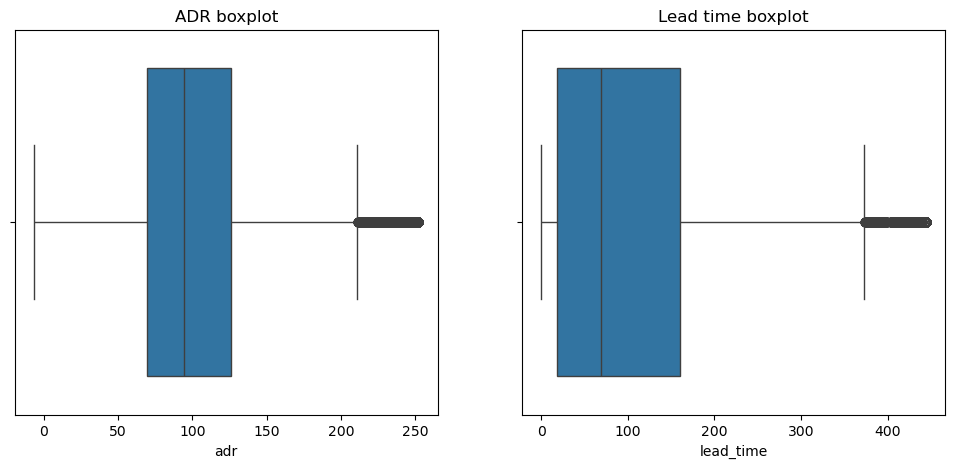

In [41]:

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x=df['adr'])
plt.title('ADR boxplot')

plt.subplot(1,2,2)
sns.boxplot(x=df['lead_time'])
plt.title('Lead time boxplot')

plt.show()

In [43]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,103.409180,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,2.321149,101.461197,0.062518,0.571363
std,0.482918,104.600923,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,17.594721,46.905155,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,444.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,252.000000,8.000000,5.000000


In [45]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [47]:
#Conversion of data types

df['children']=df['children'].astype(int)

df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])

In [49]:
df['agent']=df['agent'].fillna(0).astype(int)

In [51]:
df.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int32
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [53]:
from sklearn.preprocessing import MinMaxScaler

df_scaled = df.copy()

num_cols = ['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
            'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
            'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled',
            'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
scaler = MinMaxScaler()
# Apply scaling only to df_scaled, keeping df unchanged
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])

df_scaled.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,0.770270,2015,July,0.5,0.0,0.0,0.00,0.036364,...,0.142857,No Deposit,0,0.0,Transient,0.024692,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,1.000000,2015,July,0.5,0.0,0.0,0.00,0.036364,...,0.190476,No Deposit,0,0.0,Transient,0.024692,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,0.015766,2015,July,0.5,0.0,0.0,0.02,0.018182,...,0.000000,No Deposit,0,0.0,Transient,0.314962,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0,0.029279,2015,July,0.5,0.0,0.0,0.02,0.018182,...,0.000000,No Deposit,304,0.0,Transient,0.314962,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0,0.031532,2015,July,0.5,0.0,0.0,0.04,0.036364,...,0.000000,No Deposit,240,0.0,Transient,0.403979,0.0,0.2,Check-Out,2015-07-03


In [54]:
#Lead_time Categorization

def categorize_lead_time(days):
    if days < 30:
        return 'Short'
    elif 30 <= days < 90:
        return 'Medium'
    else:
        return 'Large'

df['lead_time_category'] = df['lead_time'].apply(categorize_lead_time)
print(df['lead_time_category'].value_counts())

lead_time_category
Large     51424
Short     38047
Medium    29919
Name: count, dtype: int64


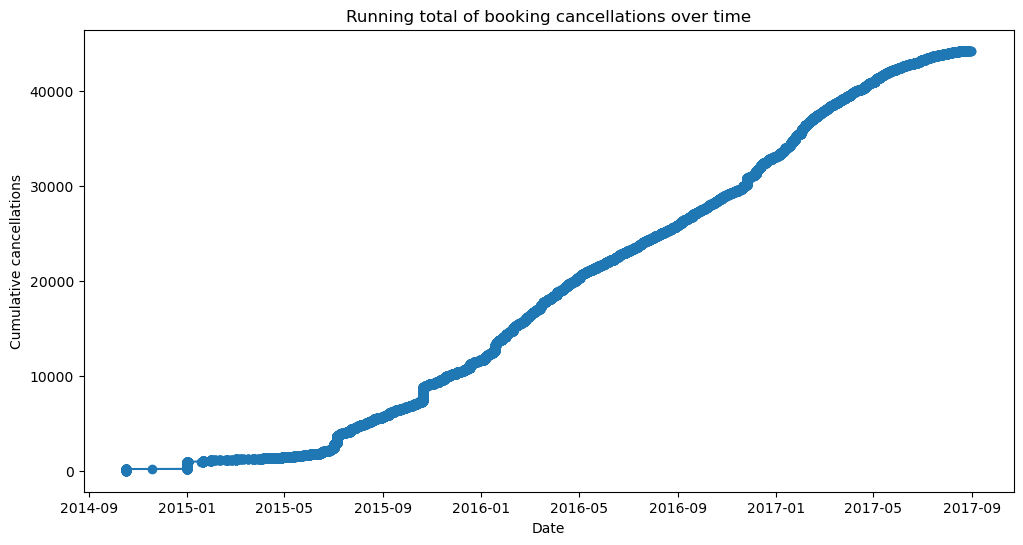

In [57]:
 #Running Total Analysis

df_cancelled=df[df['is_canceled']==1]

df_cancelled=df_cancelled.sort_values(by='reservation_status_date')

df_cancelled['running_total']=df_cancelled['is_canceled'].cumsum()

plt.figure(figsize=(12,6))
plt.plot(df_cancelled['reservation_status_date'],df_cancelled['running_total'],marker='o',linestyle='-')
plt.xlabel('Date')
plt.ylabel('Cumulative cancellations')
plt.title('Running total of booking cancellations over time')
plt.show()

In [58]:
 #weighted cancellation rate

df['weighted_cancellation_rate']=df['previous_cancellations']/df['previous_cancellations']+df['previous_bookings_not_canceled']+1
df[['previous_cancellations','previous_bookings_not_canceled','weighted_cancellation_rate']].head()

#weighted_cancellation_rate is returning NaN values because both previous_cancellations and previous_bookings_not_canceled are 0 for all rows

,previous_cancellations,previous_bookings_not_canceled,weighted_cancellation_rate
0,0,0,NaN
1,0,0,NaN
2,0,0,NaN
3,0,0,NaN
4,0,0,NaN


In [61]:
df['weighted_cancellation_rate'] = df['weighted_cancellation_rate'].fillna(0)
df[['previous_cancellations','previous_bookings_not_canceled','weighted_cancellation_rate']].head()

,previous_cancellations,previous_bookings_not_canceled,weighted_cancellation_rate
0,0,0,0.0
1,0,0,0.0
2,0,0,0.0
3,0,0,0.0
4,0,0,0.0


In [63]:
#Dynamic Rank Calculation
df['cancellation_rate']=df.groupby('hotel')['is_canceled'].transform(lambda x: x.mean())
df['hotel_rank']=df['cancellation_rate'].rank(method='dense',ascending=False)

df[['hotel','cancellation_rate','hotel_rank']].drop_duplicates().sort_values('hotel_rank')


,hotel,cancellation_rate,hotel_rank
40060,City Hotel,0.417270,1.0
0,Resort Hotel,0.277634,2.0


In [65]:
#Dynamic Market Segment Analysis:

def filter_by_market_segment(df, segment):
    return df[df["market_segment"] == segment]

segment_input = "Online TA"  
filtered_data = filter_by_market_segment(df, segment_input)
filtered_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,lead_time_category,weighted_cancellation_rate,cancellation_rate,hotel_rank
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Short,0.0,0.277634,2.0
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Short,0.0,0.277634,2.0
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,Transient,82.0,0,1,Canceled,2015-05-06,Medium,0.0,0.277634,2.0
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,Transient,123.0,0,0,Canceled,2015-06-23,Short,0.0,0.277634,2.0
11,Resort Hotel,0,35,2015,July,27,1,0,4,2,...,Transient,145.0,0,0,Check-Out,2015-07-05,Medium,0.0,0.277634,2.0


In [67]:
df["total_bookings"] = df["previous_cancellations"] + df["previous_bookings_not_canceled"]
df["cancellation_rate"] = df["previous_cancellations"] / df["total_bookings"]
high_risk_customers = df[df["cancellation_rate"] > 0.5]

high_risk_customers[["customer_type", "previous_cancellations", "previous_bookings_not_canceled", "cancellation_rate"]]

,customer_type,previous_cancellations,previous_bookings_not_canceled,cancellation_rate
13988,Transient,1,0,1.000000
13989,Transient,1,0,1.000000
14125,Transient,1,0,1.000000
14181,Transient,1,0,1.000000
14182,Transient,1,0,1.000000
...,...,...,...,...
87648,Transient,2,1,0.666667
87649,Transient,2,1,0.666667
89166,Transient,2,1,0.666667
89167,Transient,2,1,0.666667


In [69]:
#Most Frequent Guests

frequent_guests = df[df["is_repeated_guest"] == 1]
frequent_guests_summary = frequent_guests.groupby("customer_type")["is_repeated_guest"].count().reset_index()
frequent_guests_summary.rename(columns={"is_repeated_guest": "total_repeated_bookings"}, inplace=True)
frequent_guests_summary = frequent_guests_summary.sort_values(by="total_repeated_bookings", ascending=False)

print(frequent_guests_summary.head())

     customer_type  total_repeated_bookings
2        Transient                     3073
3  Transient-Party                      543
1            Group                      161
0         Contract                       33


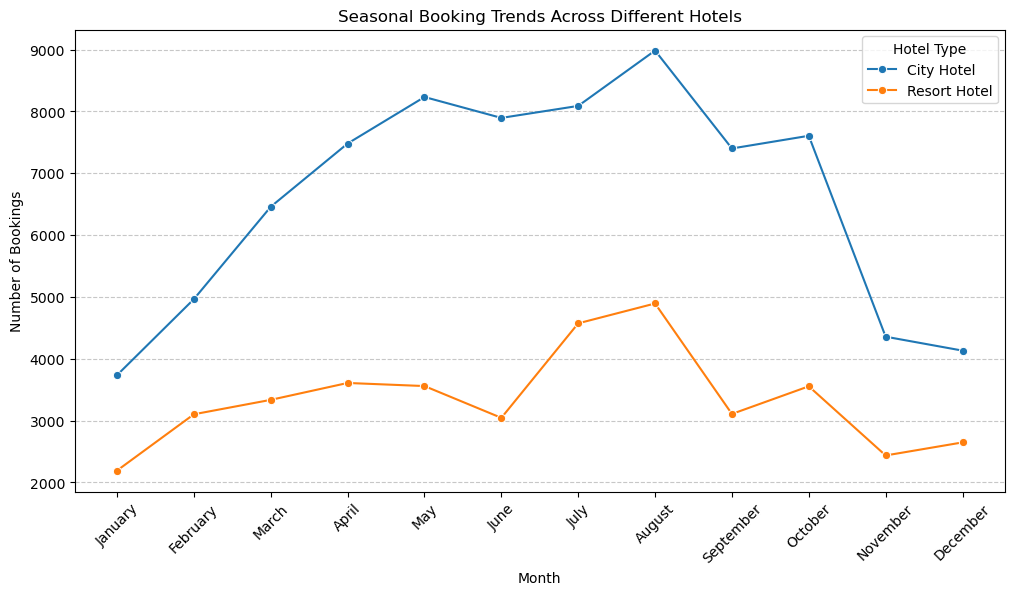

In [71]:
#Seasonal Booking Trends

# Convert 'arrival_date_month' to a categorical type with a specific order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
               'September', 'October', 'November', 'December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)

monthly_bookings = df.groupby(['arrival_date_month', 'hotel']).size().reset_index(name='booking_count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_bookings, x='arrival_date_month', y='booking_count', hue='hotel', marker="o")
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.title("Seasonal Booking Trends Across Different Hotels")
plt.legend(title="Hotel Type")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [73]:
#Hotel-Specific Cancellation Rate

hotel_cancellation_rate=df.groupby('hotel')['is_canceled'].sum().reset_index()
hotel_cancellation_rate.columns=['hotel','hotel_cancellation_rate']

print(hotel_cancellation_rate)

          hotel  hotel_cancellation_rate
0    City Hotel                    33102
1  Resort Hotel                    11122


In [75]:
country_cancellation = df.groupby('country').agg(
    total_bookings=('is_canceled', 'count'),  
    total_cancellations=('is_canceled', 'sum') 
)
country_cancellation['cancellation_rate'] = country_cancellation['total_cancellations'] / country_cancellation['total_bookings']

high_risk_countries = country_cancellation[country_cancellation['cancellation_rate'] > 0.5].reset_index()

print(high_risk_countries)

   country  total_bookings  total_cancellations  cancellation_rate
0      AGO             362                  205           0.566298
1      AND               7                    5           0.714286
2      ARE              51                   43           0.843137
3      AZE              17                    9           0.529412
4      BEN               3                    3           1.000000
5      BGD              12                    9           0.750000
6      BHR               5                    4           0.800000
7      DOM              14                    8           0.571429
8      FJI               1                    1           1.000000
9      FRO               5                    4           0.800000
10     GEO              22                   15           0.681818
11     GGY               3                    3           1.000000
12     GIB              18                   11           0.611111
13     GLP               2                    2           1.00

In [77]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from joblib import Parallel, delayed
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [79]:
features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 
            'adults', 'children', 'babies', 'previous_cancellations', 
            'previous_bookings_not_canceled', 'booking_changes', 'adr', 
            'total_of_special_requests']
target = 'is_canceled'

X = df[features]
y = df[target]

In [81]:
# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set: {X_train.shape}, Test Set: {X_test.shape}")

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=42)


Training Set: (95512, 11), Test Set: (23878, 11)


In [83]:
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear'),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42, n_jobs=-1),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, max_depth=3),
    "SVM": SVC(kernel='linear', max_iter=1000, probability=True),
    "XGBoost": XGBClassifier(n_estimators=50, max_depth=3, random_state=42, n_jobs=-1)
}

In [85]:
# Cross-validation setup
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

def train_model(name, model):
    print(f"Training {name}...")
    cv_score = cross_val_score(model, X_train_sample, y_train_sample, cv=cv, scoring='accuracy').mean()
    model.fit(X_train, y_train)
    return name, model, cv_score


In [87]:
# Train models in parallel
trained_models = Parallel(n_jobs=-1)(delayed(train_model)(name, model) for name, model in models.items())

for name, model, cv_score in trained_models:
    print(f"✅ {name} - Cross-Validation Accuracy: {cv_score:.4f}")

✅ Logistic Regression - Cross-Validation Accuracy: 0.7282
✅ Random Forest - Cross-Validation Accuracy: 0.7529
✅ Decision Tree - Cross-Validation Accuracy: 0.7362
✅ Gradient Boosting - Cross-Validation Accuracy: 0.7547
✅ SVM - Cross-Validation Accuracy: 0.4399
✅ XGBoost - Cross-Validation Accuracy: 0.7614
